# Telecom Churn Prediction

#### Introduction
Welcome to the case study module on Telecom Churn Prediction!

 

In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. As a data scientist, your task in this case study would be to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

#### Objectives

The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

 Recommend strategies to manage customer churn based on your observations.

 

Note that it's highly likely that you'll need to build multiple models to fulfil the objectives mentioned in Points 1 and 2.  Since here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model. 

 

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components that are not easy to interpret.

 

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. 

 

# Steps
In the competition link, check the Code tab for the Starter Notebook that you can use as a reference for this entire case study. Some of the steps that you can use are as follows:

#### Data Understanding, Preparation, and Pre-Processing :
Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format
 
#### Exploratory Data Analysis :
Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data
 
#### Feature Engineering and Variable Transformation :
Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date
Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data
 
#### Model Selection, Model Building, and  Prediction :
Identifying the type of problem and making a list of decisive models from all available choices
Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model
Testing each model on the respective model evaluation metric
Choosing the best model based on the fit of the data set and output variable
Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem

## 1. Importing Dependencies, Data Loading and Understanding 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, auc,roc_auc_score, roc_curve, confusion_matrix
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [2]:
#importing train and test data
train_df=pd.read_csv(r'C:\Users\Rohit Chaudhary\OneDrive\Desktop\Upgrad notes\ML2\Unsupervised learning\Assigment Telecom Churn\telecom-churn-case-study-hackathon-c37\train.csv')
test_df=pd.read_csv(r'C:\Users\Rohit Chaudhary\OneDrive\Desktop\Upgrad notes\ML2\Unsupervised learning\Assigment Telecom Churn\telecom-churn-case-study-hackathon-c37\test.csv')

In [3]:
y_test_df=pd.read_csv(r'C:\Users\Rohit Chaudhary\OneDrive\Desktop\Upgrad notes\ML2\Unsupervised learning\Assigment Telecom Churn\telecom-churn-case-study-hackathon-c37\solution.csv')
y_test=y_test_df['churn_probability']

In [4]:
train_df.shape, test_df.shape

((69999, 172), (30000, 171))

In [5]:
y_train=train_df['churn_probability']
train_df=train_df.drop(['churn_probability'], axis=1)

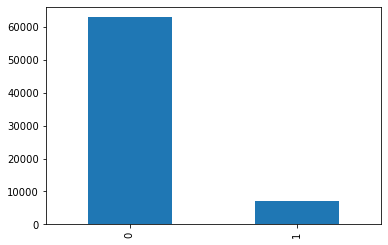

In [6]:
y_train.value_counts().plot.bar()
plt.show()

In [7]:
print('Churn percentage in training data is: ',round(100*y_train.value_counts()[1]/y_train.shape[0],2),'%')

Churn percentage in training data is:  10.19 %


In [8]:
tel_data=pd.concat([train_df,test_df],axis=0)

In [9]:
tel_data.shape

(99999, 171)

In [10]:
tel_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.

In [11]:
#Lets divide data into categorical and numeric time, thereafter we will check data in detail
#Numeric columns
num_col=list(tel_data.select_dtypes(['float64','int64','float32','int32']).columns)
len(num_col)

162

In [12]:
tel_data[num_col].head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0,109,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0
1,1,109,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,145.0,NaN,0.0,352.91,0.00,0.0,3.96,0.0,NaN,122.07,NaN,NaN,122.08,NaN,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0
2,2,109,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,0.0,0.0,

In [13]:
#Categorical columns
cat_col=list(tel_data.select_dtypes(['object']).columns)
len(cat_col)

9

In [14]:
tel_data[cat_col].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014


All the columns with date are with data type as object

## 2. Data Cleaning & Data Visulization

#### 2.1 Missing value Columns

In [15]:
#Lets check missing value columns
pd.DataFrame(round(100* tel_data.isnull().sum()/tel_data.shape[0],2), columns=['Null %'])

,Null %
id,0.00
circle_id,0.00
loc_og_t2o_mou,1.02
std_og_t2o_mou,1.02
loc_ic_t2o_mou,1.02
last_date_of_month_6,0.00
last_date_of_month_7,0.60
last_date_of_month_8,1.10
arpu_6,0.00
arpu_7,0.00


There are lot of columns with missing values more than 50%

Lets drop columns with missing vales greater than 50% and for numeric values with median values and dates with mode values

In [16]:
high_null_value_col=[]
for col in tel_data.columns:
    if (tel_data[col].isnull().sum()/tel_data.shape[0])>0.5:
        high_null_value_col.append(col)
len(high_null_value_col)  

30

In [17]:
#Lets remove these columns from num_col and cat_col
for col in high_null_value_col:
    if (tel_data[col].dtypes=='O'):
        cat_col.remove(col)
    else:
        num_col.remove(col)

In [18]:
#imputing numeric values
for col in tel_data.columns:
    if (tel_data[col].isnull().sum()/tel_data.shape[0])>0:
        #dropping columns with missing value more than 50%
        if (tel_data[col].isnull().sum()/tel_data.shape[0])>0.5:
            tel_data=tel_data.drop([col], axis=1)
            continue
            # imputing median value for numeric data tyoe
        elif (tel_data[col].dtypes=='int64') or (tel_data[col].dtypes=='float64'):
            tel_data[col]= tel_data[col].fillna(tel_data[col].median())
            continue

In order to treat missing values in dates. Lets check effect of null values in date_of_last_rech_7',date_of_last_rech_8',date_of_last_rech_6' on churn rate in training data. 

In [19]:
train_df['churn_probability']=y_train
Null_effect_on_churn=train_df[(train_df['date_of_last_rech_6'].isnull()==True) |\
                              (train_df['date_of_last_rech_7'].isnull()==True) |\
                              (train_df['date_of_last_rech_8'].isnull()==True)]
Null_effect_on_churn.shape

(4054, 172)

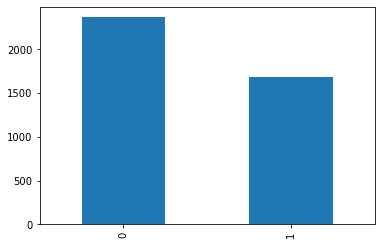

In [20]:
Null_effect_on_churn['churn_probability'].value_counts().plot.bar()
plt.show()

In [21]:
print("Churn percentage in training data in case of null values in variables is 'date_of_last_rech_6',\
'date_of_last_rech_7','date_of_last_rech_8' is: ",round(100*Null_effect_on_churn['churn_probability']\
                                                .value_counts()[1]/Null_effect_on_churn.shape[0],2),'%')

Churn percentage in training data in case of null values in variables is 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8' is:  41.61 %


- Total churn rate in training data is 10.19 %, however as seen above churn rate is very high i.e. 41.61% among cases where there are null values in variables`'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'`, indicating in these cases there was no rechare done in these months.
- `date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8` were not considered for this purpose as upon there introduction churn rate was around 11% which is almost same as total churn rate in train data. Thus it was not impacting data much hence those variables has been dropped.

In [22]:
#imputing first date of respective month i.e starting date of dataframe in 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8' 
#as we will be create new features with days since last recharge for all the variables

In [23]:
tel_data['date_of_last_rech_6'].fillna(value='6/1/2014', inplace=True)
tel_data['date_of_last_rech_7'].fillna(value='7/1/2014', inplace=True)
tel_data['date_of_last_rech_8'].fillna(value='8/1/2014', inplace=True)
tel_data['last_date_of_month_7'].fillna(tel_data['last_date_of_month_7'].value_counts().index[0], inplace=True)
tel_data['last_date_of_month_8'].fillna(tel_data['last_date_of_month_8'].value_counts().index[0], inplace=True)

In [24]:
tel_data.isnull().sum().sum()

0

In [25]:
len(num_col)+len(cat_col)==tel_data.shape[1]

True

In [26]:
#Lets remove 'id' from num_col and data
num_col.remove('id')
tel_data=tel_data.drop(['id'], axis=1)

#### 2.2 Unique value columns

In [27]:
#Lets drop columns with only single unique value as these columns adds on information to model.
single_Unique_value_col=[]
for col in tel_data.columns:
    if len(tel_data[col].unique())==1:
        single_Unique_value_col.append(col)
print(single_Unique_value_col)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [28]:
#Lets check values in these columsn
for i in single_Unique_value_col:
    print(tel_data[i].value_counts())

109    99999
Name: circle_id, dtype: int64
0.0    99999
Name: loc_og_t2o_mou, dtype: int64
0.0    99999
Name: std_og_t2o_mou, dtype: int64
0.0    99999
Name: loc_ic_t2o_mou, dtype: int64
6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
7/31/2014    99999
Name: last_date_of_month_7, dtype: int64
8/31/2014    99999
Name: last_date_of_month_8, dtype: int64
0.0    99999
Name: std_og_t2c_mou_6, dtype: int64
0.0    99999
Name: std_og_t2c_mou_7, dtype: int64
0.0    99999
Name: std_og_t2c_mou_8, dtype: int64
0.0    99999
Name: std_ic_t2o_mou_6, dtype: int64
0.0    99999
Name: std_ic_t2o_mou_7, dtype: int64
0.0    99999
Name: std_ic_t2o_mou_8, dtype: int64


We will remove all variables except 'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'. Will remove variables later on

In [29]:
for i in ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']:
    single_Unique_value_col.remove(i)
tel_data=tel_data.drop(single_Unique_value_col, axis=1)

All the varaibles were alo checked for before imputing missing values and it was seen maximun varaibles were having single value in them thus not adding any information.

In [30]:
for col in single_Unique_value_col:
    if col in num_col:
        num_col.remove(col)
    else:
        cat_col.remove(col)

In [31]:
len(num_col)+len(cat_col)==tel_data.shape[1]

True

In [32]:
tel_data.shape

(99999, 130)

####  2.2 Outliers treatment

In [33]:
#Lets check no. of outliers
Outlier_data={}
for col in num_col:
    Q1= tel_data[col].quantile(0.25)
    Q2= tel_data[col].quantile(0.75)
    IQR=Q2-Q1
    outliers=tel_data[(tel_data[col]<=(Q1-1.5*IQR)) |(tel_data[col]>=(Q2+1.5*IQR))]
    Outlier_data[col]=round(100*outliers.shape[0]/tel_data.shape[0],2)
    
Outlier_per =pd.DataFrame([Outlier_data]).T
Outlier_per.columns=['Outlier%']
Outlier_per[Outlier_per['Outlier%']>0]

,Outlier%
arpu_6,5.75
arpu_7,5.79
arpu_8,5.59
onnet_mou_6,12.26
onnet_mou_7,12.63
onnet_mou_8,12.67
offnet_mou_6,8.89
offnet_mou_7,9.25
offnet_mou_8,9.44
roam_ic_mou_6,100.00


We will not drop outliers as although statistically there are outliers but as per business these values may not be unexpected and thus cannot be called outliers by removing these datapoints we may lose important information. Therfore we will not remove these outliers 

### 3. Data Visualization:

#### 3.1 Univariate Analysis

%%time
plt.subplots(figsize=[15,250])
k=1
for col in num_col:
    plt.subplot(int(len(num_col)/2)+1,4,k)
    sns.distplot(tel_data[col])
    k=k+1

As seen above maximum variables are having values close to zero.

In [34]:
#plt.figure(figsize=(10,40))
#sns.boxplot(x='value',y='variable', data=pd.melt(tel_data[num_col]))
#plt.show()

#### 2.2 Bivariate Analysis:

#Variation of features with churning
plt.subplots(figsize=[20,300])
k=1
for col in num_col:
    plt.subplot(int(len(num_col)/2)+1,4,k)
    sns.barplot(data=train_df, x='churn_probability', y=col)
    k=k+1

As seen above there are many features which are having higher values for churn cases compared to non churn cases.

plt.figure(figsize=(40,40))
sns.heatmap(tel_data[num_col].corr(), annot=True, cmap="YlGnBu")
plt.show()

As seen in the heatmap there are multiple columns with high correlation.

In [35]:
#Lets check variables with high correlation
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
print("Top Absolute Correlations")
#displyaing top 30 best correlated pairs
print(get_top_abs_correlations(tel_data[num_col], 30))


Top Absolute Correlations
arpu_8            total_rech_amt_8    0.955952
arpu_6            total_rech_amt_6    0.953017
arpu_7            total_rech_amt_7    0.951995
isd_og_mou_7      isd_og_mou_8        0.931492
isd_og_mou_6      isd_og_mou_7        0.912532
                  isd_og_mou_8        0.906227
loc_ic_mou_6      total_ic_mou_6      0.900520
loc_ic_mou_8      total_ic_mou_8      0.889419
loc_ic_mou_7      total_ic_mou_7      0.889352
onnet_mou_8       std_og_t2t_mou_8    0.865969
onnet_mou_7       std_og_t2t_mou_7    0.859510
std_og_mou_8      total_og_mou_8      0.859191
offnet_mou_8      std_og_t2m_mou_8    0.855728
std_og_mou_7      total_og_mou_7      0.855199
std_ic_t2m_mou_8  std_ic_mou_8        0.855070
onnet_mou_6       std_og_t2t_mou_6    0.854038
offnet_mou_7      std_og_t2m_mou_7    0.853607
std_ic_t2m_mou_7  std_ic_mou_7        0.851653
std_ic_t2m_mou_6  std_ic_mou_6        0.845302
std_og_mou_6      total_og_mou_6      0.839788
offnet_mou_6      std_og_t2m_mou_6

As of now we are not going to drop any of the variables because by removing any variables we might lose some of the information. We will correlated variables during modelling.

#### 2.3 Feature Engineering

We will drive new features based on given variables

In [36]:
tel_data[cat_col].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014


In [37]:
tel_data[cat_col] = tel_data[cat_col].apply(pd.to_datetime)

Our data is of period June 2014 to August 2014. We can create variables with no. of days since last recharge in each of the month from last day of month.

In [38]:
#Lets create seperate features for no. of days since last recharge 
tel_data['days_since_last_rech_6']= (tel_data['last_date_of_month_6']- tel_data['date_of_last_rech_6']).dt.days
tel_data['days_since_last_rech_7']= (tel_data['last_date_of_month_7']- tel_data['date_of_last_rech_7']).dt.days
tel_data['days_since_last_rech_8']= (tel_data['last_date_of_month_8']- tel_data['date_of_last_rech_8']).dt.days

In [39]:
tel_data=tel_data.drop(cat_col, axis=1)

# 4. Data Preperation

#### 4.1  Filter high-value customers:
As mentioned, we need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount.

In [40]:
#High Value Customer Extraction
#lets extract high value customers based on the average recharge amount
y_test_train=pd.concat([y_train,y_test], axis=0)
tel_data['Churn']=y_test_train
tel_data_hv=tel_data[tel_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].\
               mean(axis=1)> tel_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].mean(axis=1).quantile(0.7)]
tel_data.drop(['Churn'], axis=1, inplace=True)

In [41]:
tel_data_hv.shape,tel_data.shape

((29998, 128), (99999, 127))

#### 4.2 Train Test Split for Model 1 i.e. for purpose of Interpretation

In [42]:
#Handling class imbalance using smote for Model 1

In [43]:
#lets print the stats before sampling
print("counts of label '1':",sum(y_test_train==1))
print("counts of label '0':",sum(y_test_train==0))

counts of label '1': 10191
counts of label '0': 89808


In [44]:
#Defining X & Y
X_hv=tel_data_hv.drop(['Churn'], axis=1)
y_hv=tel_data_hv['Churn']

In [45]:
#Train test Split
from sklearn.model_selection import train_test_split
X_train_hv, X_test_hv, y_train_hv, y_test_hv=train_test_split(X_hv,y_hv, random_state=42, train_size=0.7, stratify=y_hv)

As seen above there is high class imbalance

#### Imbalanced Classes

The problem we are trying to solve is a Classification Problem: we are trying to take each customer and classify them into either the Non-Churn Class (denoted as a 0) or the Churn Class (denoted as a 1).

Whenever we have a classification problem, it is important to note how frequently we observe each class in the dataset. In our case, we have significantly more Non-Churn cases than we do Churn Cases, as we’d hope would be the case for any business.

Noting class imbalances is important for evaluating modeling accuracy results.

For example, if I told you the model I built classifies 84% of cases correctly, that might seem pretty good. But in this case, Non-Churn cases represent 84% of the data, so, in theory, the model could just classify everything as Non-Churn and achieve an 84% accuracy score.

Therefore, when are evaluating model performance with an imbalanced dataset, we want to judge the model based mainly on how it performs on the minority class.

##### Recall
A Churn class Recall of 0.91 means that the model was able to catch 91% of the actual Churn cases. This is the measure we really care about, because we want to miss as few of the true Churn cases as possible.

##### Precision
Precision of the Churn class measures how often the model catches an actual Churn case, while also factoring in how often it misclassifies a Non-Churn case as a Churn case. In this case, a Churn Precision of 0.84 is not a problem because there are no significant consequences of identifying a customer as a Churn risk when they are not.

In [46]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [47]:
#perform oversampling using smote
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_smo, y_train_smo = oversample.fit_resample(X_train_hv, y_train_hv)

In [48]:
#lets print the stats before sampling
print("counts of label '1':",sum(y_train_smo==1))
print("counts of label '0':",sum(y_train_smo==0))

counts of label '1': 19702
counts of label '0': 19702


As seen above now there is no class imbalance.

####  4.3 Defining X, y for Model 2 for submission in Kaggle

In [49]:
X_train=tel_data.iloc[0:69999 ,]
X_test=tel_data.iloc[69999:,]

In [50]:
X_train.shape, X_test.shape

((69999, 127), (30000, 127))

#### 4.4 Scaling of Data

##### 4.4.1 For Model 1

In [51]:
#scaler object
scaler=MinMaxScaler()
#Fit and transform in scaler objcet
X_train_smo[X_train_smo.columns]=scaler.fit_transform(X_train_smo[X_train_smo.columns])
#transforming test data
X_test_hv[X_test_hv.columns]=scaler.transform(X_test_hv[X_test_hv.columns])

##### 4.4.2 For Model 2

In [52]:
#scaler object
scaler=MinMaxScaler()
#Fit and transform in scaler objcet
X_train[X_train.columns]=scaler.fit_transform(X_train[X_train.columns])
#transforming test data
X_test[X_test.columns]=scaler.transform(X_test[X_test.columns])

# 5. Model Development-Validation and Evaluation

We will be creating two spearate models for follwing purposes:
1. To predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc. and for this purpose best model is Logistic Regression ehich can be used to explain the result for all the customers.
2. To predict highest acuuracy as overall accuracy is primary evaluation metric in Kaggle.

#### 5.1 Model 1 with Logistic Regression

In [53]:
%%time
lr=LogisticRegression()
folds = 1
lr.fit(X_train_smo, y_train_smo)
rfe=RFE(lr)
#As we don't want model to be complex checking behaviour of model upto 50 features
hyper_params=[{'n_features_to_select':[10,25,35,40]}] 
cv_model=GridSearchCV(estimator=rfe,
                      param_grid=hyper_params,
                      scoring="recall",
                      cv=folds,
                      verbose=1,
                      return_train_score=True)
cv_model.fit(X_train_smo, y_train_smo)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
Wall time: 20min 33s


GridSearchCV(cv=2, estimator=RFE(estimator=LogisticRegression()),
             param_grid=[{'n_features_to_select': [20, 30, 40, 50, 60, 70]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [54]:
cv_resuls=pd.DataFrame(cv_model.cv_results_)
cv_model.best_params_

{'n_features_to_select': 50}

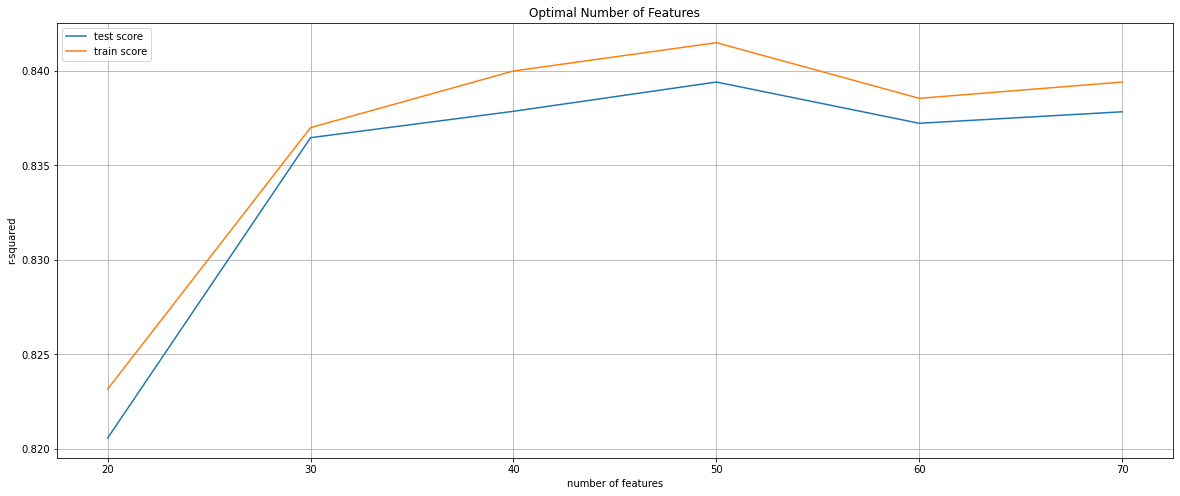

In [57]:
#lets plot mean test and train score to calculate ideal no. of features
cv_plot = cv_resuls
plt.figure(figsize=(20,8))
plt.plot(cv_plot["param_n_features_to_select"],cv_plot["mean_test_score"])
plt.plot(cv_plot["param_n_features_to_select"],cv_plot["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.grid()
plt.show()

In [69]:
#lets implement RFE to reduce features
# define the method
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=35)
# fit the model
rfe.fit(X_train_smo, y_train_smo)

RFE(estimator=LogisticRegression(), n_features_to_select=35)

In [70]:
col=X_train_smo.columns[rfe.support_]

In [71]:
#                                Predicted
#                           Not Churn     Churn
#Actual Not churn              TN           FP 
#Actual Churn                  FN           TP 

In [72]:
def Metrics(X,y,classifier, model):
    metrics={}
    y_pred=classifier.predict(X)
    cm=confusion_matrix(y,y_pred)
    TP=cm[1,1]
    TN=cm[0,0]
    FP=cm[0,1]
    FN=cm[1,0]
    Acc=100*round((TP+TN)/(TP+TN+FP+FN),4)
    Sen=100*round((TP)/(TP+FN),4)
    spec=100*round((TN)/(TN+FP),4)
    prec=100*round((TP)/(TP+FP),4)
    reca=100*round((TP)/(TP+FN),4)
    TPR=100*round((TP)/(TP+FN),4)
    FPR=100*round((FP)/(TN+FP),4)
    return {'Model':model,'Accuracy':Acc,'Sensitivity':Sen,'Specificity':spec,'Precision':prec,'Recall':reca,\
            'True Positive rate':TPR,'False Positive rate':FPR}

In [73]:
logreg=LogisticRegression()
logreg.fit(X_train_smo[col], y_train_smo)

LogisticRegression()

In [74]:
metrics= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
metrics=metrics.append(Metrics(X_train_smo[col], y_train_smo,logreg, 'Logistic Regression train'),ignore_index=True)
metrics=metrics.append(Metrics(X_test_hv[col], y_test_hv,logreg, 'Logistic Regression test'),ignore_index=True)
metrics.set_index("Model", inplace=True)
metrics

,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate
Model,,,,,,,
Logistic Regression train,84.11,84.62,83.61,83.77,84.62,84.62,16.39
Logistic Regression test,83.47,80.18,83.68,24.41,80.18,80.18,16.32


In [111]:
#Lets check p value and VIF for model
def Stats_Model(X,y):
    # add constant to X_train
    global X_train_sm
    X_train_sm= sm.add_constant(X)
    global lr
    lr=sm.GLM(y,X_train_sm, family=sm.families.Binomial())
    Linear_model=lr.fit()
    return Linear_model.summary()

def VIF(X):
    VIF=pd.DataFrame({"Features":X.columns})
    VIF["vif"]= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    VIF["vif"] =round(VIF["vif"],2)
    VIF=VIF.sort_values(by="vif", ascending =False)
    return VIF

In [87]:
print(Stats_Model(X_train_smo[col], y_train_smo))

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39368
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14839.
Date:                Mon, 11 Jul 2022   Deviance:                       29679.
Time:                        09:57:57   Pearson chi2:                 3.51e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.7063      0.307     -8.809      0.000      -3.308      -2.104
arpu_6                    10.1062      3.488      2.897      0.004       3.270      16.942
arpu_7                    34.1096      2.437     13.997      0.000      29.333      38.886
roam_ic_mou_7              5.0980      0.700      7.280      0.000       3.726       6.471
roam_og_mou_8             11.5751      0.865     13.386      0.000       9.880      13.270
loc_og_t2m_mou_8          -8.7695      1.178     -7.445      0.000     -11.078      -6.461
loc_og_t2f_mou_8          -4.0306      0.979     -4.118      0.000      -5.949      -2.112
loc_og_mou_8             149.5970      9.451     15.829      0.000     131.074     168.120
std_og_mou_7               4.3126      0.458      9.411      0.000       3.415       5.211
std_og_mou_8             215.3933     12.860     16.749      0.000     190.187     240.599
spl_og_mou_8              13.5766      2.033      6.678      0.000       9.592      17.562
total_og_mou_8          -228.1420     12.882    -17.710      0.000    -253.391    -202.893
loc_ic_t2m_mou_7          -0.3324      1.321     -0.252      0.801      -2.921       2.256
loc_ic_t2m_mou_8           2.4807      2.860      0.867      0.386      -3.125       8.087
loc_ic_t2f_mou_6         -13.3350      2.085     -6.394      0.000     -17.422      -9.248
loc_ic_t2f_mou_7         -13.8086      2.015     -6.852      0.000     -17.758      -9.859
loc_ic_t2f_mou_8           4.8118      2.200      2.187      0.029       0.500       9.124
loc_ic_mou_7              22.1569      2.651      8.358      0.000      16.961      27.352
loc_ic_mou_8             -17.6231      2.735     -6.445      0.000     -22.983     -12.263
total_ic_mou_7             3.0207      1.499      2.016      0.044       0.084       5.958
total_ic_mou_8           -13.6281      1.512     -9.014      0.000     -16.591     -10.665
spl_ic_mou_8              -7.9275      1.012     -7.830      0.000      -9.912      -5.943
total_rech_amt_6           2.7324      3.319      0.823      0.410      -3.773       9.238
last_day_rch_amt_8       -13.9651      0.636    -21.963      0.000     -15.211     -12.719
vol_2g_mb_6                7.5237      0.984      7.644      0.000       5.595       9.453
vol_2g_mb_7                5.7479      0.750      7.661      0.000       4.277       7.218
vol_3g_mb_6               10.8898      1.996      5.455      0.000       6.977      14.803
vol_3g_mb_7               10.4461      1.157      9.026      0.000       8.178      12.714
monthly_2g_6              -5.8062      0.405    -14.347      0.000      -6.599      -5.013
monthly_2g_7              -7.6935      0.551    -13.952      0.000      -8.774      -6.613
monthly_2g_8             -13.8525      0.835    -16.598      0.000     -15.488  

In [90]:
# Dropping loc_ic_t2m_mou_7 due to high p value
col=list(col)
col.remove('loc_ic_t2m_mou_7')
print(Stats_Model(X_train_smo[col], y_train_smo))

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39369
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14839.
Date:                Mon, 11 Jul 2022   Deviance:                       29679.
Time:                        09:59:32   Pearson chi2:                 3.52e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.7027      0.307     -8.807      0.000      -3.304      -2.101
arpu_6                    10.1030      3.488      2.897      0.004       3.267      16.939
arpu_7                    34.0519      2.426     14.038      0.000      29.298      38.806
roam_ic_mou_7              5.1035      0.700      7.292      0.000       3.732       6.475
roam_og_mou_8             11.5749      0.865     13.386      0.000       9.880      13.270
loc_og_t2m_mou_8          -8.8353      1.146     -7.708      0.000     -11.082      -6.589
loc_og_t2f_mou_8          -4.0338      0.979     -4.122      0.000      -5.952      -2.116
loc_og_mou_8             149.7038      9.440     15.858      0.000     131.202     168.206
std_og_mou_7               4.3168      0.458      9.428      0.000       3.419       5.214
std_og_mou_8             215.3669     12.860     16.748      0.000     190.163     240.571
spl_og_mou_8              13.5728      2.033      6.676      0.000       9.588      17.558
total_og_mou_8          -228.1126     12.881    -17.709      0.000    -253.360    -202.866
loc_ic_t2m_mou_8           2.0043      2.143      0.935      0.350      -2.197       6.205
loc_ic_t2f_mou_6         -13.3415      2.085     -6.398      0.000     -17.429      -9.254
loc_ic_t2f_mou_7         -13.7535      2.004     -6.863      0.000     -17.681      -9.826
loc_ic_t2f_mou_8           4.7485      2.185      2.173      0.030       0.465       9.032
loc_ic_mou_7              21.7290      2.033     10.689      0.000      17.745      25.713
loc_ic_mou_8             -17.3383      2.487     -6.970      0.000     -22.214     -12.463
total_ic_mou_7             3.0180      1.499      2.014      0.044       0.081       5.955
total_ic_mou_8           -13.6208      1.512     -9.011      0.000     -16.583     -10.658
spl_ic_mou_8              -7.9279      1.012     -7.831      0.000      -9.912      -5.944
total_rech_amt_6           2.7333      3.319      0.824      0.410      -3.771       9.238
last_day_rch_amt_8       -13.9583      0.635    -21.973      0.000     -15.203     -12.713
vol_2g_mb_6                7.5210      0.984      7.642      0.000       5.592       9.450
vol_2g_mb_7                5.7526      0.750      7.670      0.000       4.283       7.223
vol_3g_mb_6               10.8976      1.996      5.459      0.000       6.985      14.810
vol_3g_mb_7               10.4489      1.157      9.031      0.000       8.181      12.717
monthly_2g_6              -5.8047      0.405    -14.345      0.000      -6.598      -5.012
monthly_2g_7              -7.6954      0.551    -13.958      0.000      -8.776      -6.615
monthly_2g_8             -13.8500      0.835    -16.594      0.000     -15.486     -12.214
sachet_2g_8              -16.4814      0.730    -22.583      0.000     -17.912  

In [91]:
# Dropping total_rech_amt_6 due to high p value
col.remove('total_rech_amt_6')
print(Stats_Model(X_train_smo[col], y_train_smo))

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39370
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14840.
Date:                Mon, 11 Jul 2022   Deviance:                       29680.
Time:                        10:00:37   Pearson chi2:                 3.45e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.9192      0.159    -18.359      0.000      -3.231      -2.608
arpu_6                    12.7480      1.364      9.349      0.000      10.076      15.421
arpu_7                    34.3548      2.397     14.331      0.000      29.656      39.053
roam_ic_mou_7              5.1148      0.699      7.313      0.000       3.744       6.486
roam_og_mou_8             11.5722      0.862     13.427      0.000       9.883      13.261
loc_og_t2m_mou_8          -8.8330      1.146     -7.709      0.000     -11.079      -6.587
loc_og_t2f_mou_8          -4.0320      0.978     -4.121      0.000      -5.949      -2.115
loc_og_mou_8             149.6035      9.433     15.860      0.000     131.115     168.092
std_og_mou_7               4.3016      0.457      9.403      0.000       3.405       5.198
std_og_mou_8             215.2352     12.850     16.750      0.000     190.050     240.420
spl_og_mou_8              13.5226      2.033      6.652      0.000       9.538      17.507
total_og_mou_8          -227.9851     12.871    -17.712      0.000    -253.213    -202.757
loc_ic_t2m_mou_8           1.9817      2.144      0.925      0.355      -2.219       6.183
loc_ic_t2f_mou_6         -13.3304      2.086     -6.390      0.000     -17.419      -9.242
loc_ic_t2f_mou_7         -13.7460      2.003     -6.863      0.000     -17.672      -9.820
loc_ic_t2f_mou_8           4.6882      2.190      2.141      0.032       0.396       8.981
loc_ic_mou_7              21.7096      2.032     10.682      0.000      17.726      25.693
loc_ic_mou_8             -17.2824      2.487     -6.950      0.000     -22.156     -12.409
total_ic_mou_7             3.0181      1.498      2.015      0.044       0.082       5.954
total_ic_mou_8           -13.6626      1.511     -9.041      0.000     -16.624     -10.701
spl_ic_mou_8              -7.9268      1.012     -7.829      0.000      -9.911      -5.942
last_day_rch_amt_8       -13.9228      0.632    -22.016      0.000     -15.162     -12.683
vol_2g_mb_6                7.5173      0.985      7.632      0.000       5.587       9.448
vol_2g_mb_7                5.7434      0.750      7.654      0.000       4.273       7.214
vol_3g_mb_6               10.8739      1.998      5.443      0.000       6.958      14.790
vol_3g_mb_7               10.4246      1.157      9.010      0.000       8.157      12.692
monthly_2g_6              -5.8021      0.405    -14.337      0.000      -6.595      -5.009
monthly_2g_7              -7.6988      0.551    -13.963      0.000      -8.780      -6.618
monthly_2g_8             -13.8607      0.835    -16.598      0.000     -15.497     -12.224
sachet_2g_8              -16.4781      0.730    -22.581      0.000     -17.908     -15.048
monthly_3g_6             -11.8372      0.949    -12.471      0.000     -13.698  

In [92]:
# Dropping total_rech_amt_6 due to high p value
col=list(col)
col.remove('loc_ic_t2m_mou_8')
print(Stats_Model(X_train_smo[col], y_train_smo))

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39371
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14840.
Date:                Mon, 11 Jul 2022   Deviance:                       29681.
Time:                        10:01:04   Pearson chi2:                 3.45e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.9086      0.158    -18.352      0.000      -3.219      -2.598
arpu_6                    12.7434      1.363      9.348      0.000      10.072      15.415
arpu_7                    34.1922      2.390     14.308      0.000      29.509      38.876
roam_ic_mou_7              5.1220      0.699      7.331      0.000       3.753       6.491
roam_og_mou_8             11.5630      0.861     13.427      0.000       9.875      13.251
loc_og_t2m_mou_8          -8.4323      1.062     -7.937      0.000     -10.515      -6.350
loc_og_t2f_mou_8          -4.0193      0.978     -4.110      0.000      -5.936      -2.103
loc_og_mou_8             149.2707      9.426     15.836      0.000     130.796     167.745
std_og_mou_7               4.3154      0.457      9.440      0.000       3.419       5.211
std_og_mou_8             215.3138     12.848     16.758      0.000     190.132     240.496
spl_og_mou_8              13.5227      2.033      6.652      0.000       9.538      17.507
total_og_mou_8          -228.0693     12.870    -17.721      0.000    -253.294    -202.845
loc_ic_t2f_mou_6         -13.3283      2.085     -6.393      0.000     -17.415      -9.242
loc_ic_t2f_mou_7         -13.7031      2.000     -6.851      0.000     -17.623      -9.783
loc_ic_t2f_mou_8           4.3961      2.160      2.035      0.042       0.163       8.629
loc_ic_mou_7              21.7962      2.029     10.743      0.000      17.820      25.773
loc_ic_mou_8             -15.9482      2.013     -7.923      0.000     -19.893     -12.003
total_ic_mou_7             2.9874      1.497      1.996      0.046       0.053       5.922
total_ic_mou_8           -13.6325      1.510     -9.027      0.000     -16.592     -10.673
spl_ic_mou_8              -7.9199      1.013     -7.822      0.000      -9.904      -5.935
last_day_rch_amt_8       -13.9198      0.632    -22.018      0.000     -15.159     -12.681
vol_2g_mb_6                7.5259      0.985      7.641      0.000       5.596       9.456
vol_2g_mb_7                5.7465      0.750      7.658      0.000       4.276       7.217
vol_3g_mb_6               10.8745      1.997      5.444      0.000       6.960      14.790
vol_3g_mb_7               10.4442      1.157      9.029      0.000       8.177      12.711
monthly_2g_6              -5.8067      0.405    -14.350      0.000      -6.600      -5.014
monthly_2g_7              -7.7010      0.551    -13.969      0.000      -8.782      -6.621
monthly_2g_8             -13.8587      0.835    -16.596      0.000     -15.495     -12.222
sachet_2g_8              -16.4729      0.730    -22.574      0.000     -17.903     -15.043
monthly_3g_6             -11.8530      0.949    -12.488      0.000     -13.713      -9.993
monthly_3g_7              -6.1339      0.855     -7.177      0.000      -7.809  

In [95]:
#Now that all the varaibles are significant Checking VIF value
VIF(X_train_smo[col])

,Features,vif
10,total_og_mou_8,414.80
8,std_og_mou_8,267.14
6,loc_og_mou_8,81.63
1,arpu_7,43.99
0,arpu_6,39.61
15,loc_ic_mou_8,14.98
17,total_ic_mou_8,13.74
14,loc_ic_mou_7,12.91
16,total_ic_mou_7,12.14
4,loc_og_t2m_mou_8,3.96


In [96]:
# dropping total_og_mou_8 due to high VIF
col.remove('total_og_mou_8')
print(Stats_Model(X_train_smo[col], y_train_smo))

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39372
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15066.
Date:                Mon, 11 Jul 2022   Deviance:                       30132.
Time:                        10:06:20   Pearson chi2:                 3.90e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.4736      0.142    -10.346      0.000      -1.753      -1.194
arpu_6                    10.7885      1.283      8.409      0.000       8.274      13.303
arpu_7                    14.6952      2.074      7.086      0.000      10.631      18.760
roam_ic_mou_7              6.5714      0.718      9.151      0.000       5.164       7.979
roam_og_mou_8             10.8552      0.785     13.835      0.000       9.317      12.393
loc_og_t2m_mou_8          -8.0036      1.068     -7.493      0.000     -10.097      -5.910
loc_og_t2f_mou_8          -4.5582      0.996     -4.578      0.000      -6.510      -2.607
loc_og_mou_8             -15.7636      1.373    -11.484      0.000     -18.454     -13.073
std_og_mou_7               6.2955      0.444     14.193      0.000       5.426       7.165
std_og_mou_8             -12.1287      0.603    -20.114      0.000     -13.311     -10.947
spl_og_mou_8             -11.4756      1.568     -7.318      0.000     -14.549      -8.402
loc_ic_t2f_mou_6         -11.3011      1.988     -5.685      0.000     -15.197      -7.405
loc_ic_t2f_mou_7         -13.6741      1.987     -6.882      0.000     -17.568      -9.780
loc_ic_t2f_mou_8           3.2453      2.189      1.483      0.138      -1.045       7.536
loc_ic_mou_7              15.9667      2.114      7.552      0.000      11.823      20.110
loc_ic_mou_8              -5.1735      2.060     -2.512      0.012      -9.210      -1.137
total_ic_mou_7             8.2804      1.636      5.061      0.000       5.074      11.487
total_ic_mou_8           -23.4813      1.608    -14.600      0.000     -26.634     -20.329
spl_ic_mou_8              -8.0754      1.016     -7.945      0.000     -10.068      -6.083
last_day_rch_amt_8       -13.9682      0.620    -22.525      0.000     -15.184     -12.753
vol_2g_mb_6                7.9032      0.968      8.168      0.000       6.007       9.800
vol_2g_mb_7                6.0877      0.744      8.178      0.000       4.629       7.547
vol_3g_mb_6               11.1549      1.867      5.976      0.000       7.496      14.814
vol_3g_mb_7               13.1544      1.126     11.677      0.000      10.947      15.362
monthly_2g_6              -5.7799      0.393    -14.705      0.000      -6.550      -5.010
monthly_2g_7              -7.8899      0.551    -14.326      0.000      -8.969      -6.810
monthly_2g_8             -14.3378      0.841    -17.048      0.000     -15.986     -12.689
sachet_2g_8              -16.8761      0.736    -22.933      0.000     -18.318     -15.434
monthly_3g_6             -10.7795      0.908    -11.878      0.000     -12.558      -9.001
monthly_3g_7              -6.0924      0.847     -7.195      0.000      -7.752      -4.433
monthly_3g_8             -18.7651      1.088    -17.245      0.000     -20.898  

In [99]:
# dropping loc_ic_t2f_mou_8 due to high p value
col.remove('loc_ic_t2f_mou_8')
print(Stats_Model(X_train_smo[col], y_train_smo))
print(VIF(X_train_smo[col]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39373
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15067.
Date:                Mon, 11 Jul 2022   Deviance:                       30134.
Time:                        10:08:12   Pearson chi2:                 3.94e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1

In [100]:
# dropping arpu_7 due to high VIF
col.remove('arpu_7')
print(Stats_Model(X_train_smo[col], y_train_smo))
print(VIF(X_train_smo[col]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39374
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15097.
Date:                Mon, 11 Jul 2022   Deviance:                       30193.
Time:                        10:09:10   Pearson chi2:                 4.60e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [101]:
# dropping loc_ic_mou_8   due to high VIF
col.remove('loc_ic_mou_8')
print(Stats_Model(X_train_smo[col], y_train_smo))
print(VIF(X_train_smo[col]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39375
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15099.
Date:                Mon, 11 Jul 2022   Deviance:                       30198.
Time:                        10:09:48   Pearson chi2:                 4.01e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [112]:
# dropping total_ic_mou_7   due to high VIF

print(Stats_Model(X_train_smo[col], y_train_smo))
print(VIF(X_train_smo[col]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                39404
Model:                            GLM   Df Residuals:                    39376
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15145.
Date:                Mon, 11 Jul 2022   Deviance:                       30290.
Time:                        10:20:33   Pearson chi2:                 4.26e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [103]:
#Avove model is acceptable as model is having p values less than 5% and  maximum VIF  around 5.

In [115]:
#Logistics regression on these features
logreg.fit(X_train_smo[col], y_train_smo)
y_train_pred_hv=logreg.predict(X_train_smo[col])

In [116]:
metrics= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
metrics=metrics.append(Metrics(X_train_smo[col], y_train_smo,logreg, 'Logistic Regression train'),ignore_index=True)
metrics=metrics.append(Metrics(X_test_hv[col], y_test_hv,logreg, 'Logistic Regression test'),ignore_index=True)
metrics.set_index("Model", inplace=True)
metrics

,Accuracy,Sensitivity,Specificity,Precision,Recall,True Positive rate,False Positive rate
Model,,,,,,,
Logistic Regression train,84.06,84.78,83.34,83.58,84.78,84.78,16.66
Logistic Regression test,83.10,78.56,83.40,23.72,78.56,78.56,16.60


Logistic Regression train	84.11	84.62	83.61	83.77	84.62	84.62	16.39
Logistic Regression test	83.47	80.18	83.68	24.41	80.18	80.18	16.32

There is not much drop in accuracy of model for train and test model even after dropping  multiple features due to high VIF and p value.

As in instant case we are interested in Sensitivity recall score, lets create model with optimum probabilities.

In [123]:
#Predicted_churn_probability
y_train_pred_proba=logreg.predict_proba(X_train_smo[col])[:,1]

In [125]:
Prediction =pd.DataFrame({"Actual_Churn":y_train_smo, "Predicted_churn_probability":y_train_pred_proba})
Prediction.head()

,Actual_Churn,Predicted_churn_probability
0,0,0.970023
1,0,0.261046
2,0,0.042808
3,0,0.004997
4,0,0.049897


#### Finding Optimal Cutoff Point

In [127]:
#Optimal cutoof point is tradeoff between sensitivity and specificity.
probabilities =[float(i/10) for i in range(10)]
probabilities

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [130]:
for i in probabilities:
    Prediction[i]= Prediction["Predicted_churn_probability"].map(lambda x : 1 if x>i else 0)
Prediction.head()

,Actual_Churn,Predicted_churn_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.970023,1,1,1,1,1,1,1,1,1,1
1,0,0.261046,1,1,1,0,0,0,0,0,0,0
2,0,0.042808,1,0,0,0,0,0,0,0,0,0
3,0,0.004997,1,0,0,0,0,0,0,0,0,0
4,0,0.049897,1,0,0,0,0,0,0,0,0,0


In [131]:
Metrics_df= pd.DataFrame(columns=['prob','Sensitivity','Specificity','Accuracy','recall', 'Precision'])
prob=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in prob:
    cm = confusion_matrix(Prediction.Actual_Churn,Prediction[i])
    TP=cm[1,1]
    FP=cm[0,1]
    FN=cm[1,0]
    TN=cm[0,0]
    Sensitivity= (TP/(TP+FN))
    Specificity= (TN/(TN+FP))
    Accuracy= ((TN+TP)/(TN+FP+FN+TP))
    recall=Sensitivity
    Precision=(TP/(TP+FP))
    
    Metrics_df.loc[i] =[ i ,Sensitivity,Specificity,Accuracy, recall, Precision]
Metrics_df

,prob,Sensitivity,Specificity,Accuracy,recall,Precision
0.0,0.0,1.000000,0.000000,0.500000,1.000000,0.500000
0.1,0.1,0.989696,0.333621,0.661659,0.989696,0.597616
0.2,0.2,0.968937,0.484773,0.726855,0.968937,0.652850
0.3,0.3,0.942036,0.616638,0.779337,0.942036,0.710757
0.4,0.4,0.900619,0.732819,0.816719,0.900619,0.771210
0.5,0.5,0.847833,0.833418,0.840625,0.847833,0.835785
0.6,0.6,0.770683,0.898894,0.834788,0.770683,0.884024
0.7,0.7,0.659730,0.937468,0.798599,0.659730,0.913422
0.8,0.8,0.482438,0.965384,0.723911,0.482438,0.933052
0.9,0.9,0.262562,0.984875,0.623718,0.262562,0.945531


In [133]:
#Sensitivity_specificity tradeoff

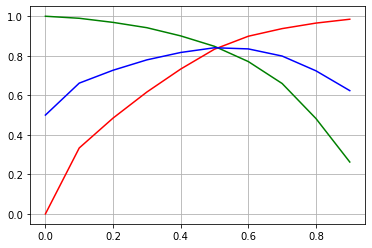

In [135]:
plt.plot(Metrics_df.prob,Metrics_df.Specificity, color='r')
plt.plot(Metrics_df.prob,Metrics_df.Sensitivity, color='g')
plt.plot(Metrics_df.prob,Metrics_df.Accuracy, color='b')
plt.grid()
plt.show()

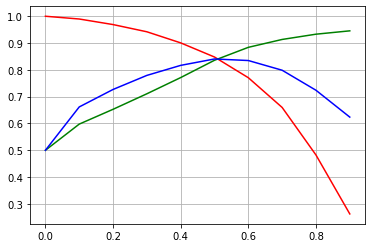

In [136]:
plt.plot(Metrics_df.prob,Metrics_df.recall, color='r')
plt.plot(Metrics_df.prob,Metrics_df.Precision, color='g')
plt.plot(Metrics_df.prob,Metrics_df.Accuracy, color='b')
plt.grid()
plt.show()

As seen above Recall-Precisison , Specificity and sensitivity trade off curves are both indicating optimum probability as 0.5, there for no change is required in optimum probability.

In [137]:
y_test_pred_proba=logreg.predict_proba(X_test_hv[col])

In [138]:
tpr,fpr,thres= roc_curve(y_test_hv,y_test_pred_proba[:,1],drop_intermediate =False)

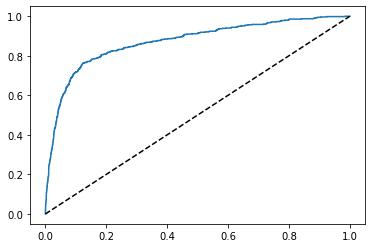

In [139]:
plt.plot(tpr,fpr)
plt.plot([0,1],[0,1],"k--")
plt.show()

In [140]:
area_under_curve= roc_auc_score(y_test_hv,logreg.predict(X_test_hv[col]))
round(area_under_curve,4)

0.8098

In [141]:
imp_feature=pd.DataFrame({'Features': X_test_hv[col].columns,'Coeff':logreg.coef_.reshape(-1)})
imp_feature=imp_feature.sort_values(by='Coeff',key=abs,  ascending =False)
imp_feature.head(15)

,Features,Coeff
12,total_ic_mou_8,-16.023954
7,std_og_mou_8,-11.753400
14,last_day_rch_amt_8,-11.149973
22,sachet_2g_8,-10.568325
25,monthly_3g_8,-10.395970
3,loc_og_t2m_mou_8,-9.885357
21,monthly_2g_8,-9.588763
5,loc_og_mou_8,-9.098650
2,roam_og_mou_8,8.593752
0,arpu_6,7.800880


#### 5.2 Model 2 Development without PCA

In [ ]:
%%time
output= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
classifiers = {'Logistic Regression': LogisticRegression(),
                'KNN': KNeighborsClassifier(),
                'Decision Tree':DecisionTreeClassifier(),
                'Random Forest': RandomForestClassifier(),
                'Ada Boost':AdaBoostClassifier(),
                'GradientBoosting':GradientBoostingClassifier(),
                'XGBoost':xgb.XGBClassifier()}
for model,classifier in classifiers.items():
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_smo, y_train_smo)
    output=output.append(Metrics(X_train_smo, y_train_smo,classifier,model),ignore_index=True)
output.set_index("Model", inplace=True)
output

#### 5.2 Model Development with PCA

In [ ]:
pca=PCA()

In [ ]:
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [ ]:
plt.plot(range(0,len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.show()

In [ ]:
pca=PCA(0.9999)

In [ ]:
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
X_train_pca.shape

In [ ]:
%%time
output_pca= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
classifiers = {'Logistic Regression': LogisticRegression(),
               'KNN': KNeighborsClassifier(),
                'Decision Tree':DecisionTreeClassifier(),
                'Random Forest': RandomForestClassifier(),
                'Ada Boost':AdaBoostClassifier(),
                'GradientBoosting':GradientBoostingClassifier(),
                'XGBoost':xgb.XGBClassifier()}
for model,classifier in classifiers.items():
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_pca, y_train)
    output_pca=output_pca.append(Metrics(X_train_pca,y_train,classifier,model),ignore_index=True)
output_pca.set_index("Model", inplace=True)
output_pca

As seen above PCA is not helping much in increasing the Recall for the case even when 99% of variance is expained through PCA, may be because there is very less correlation among data or because of non linear data. Further, execution time with PCA is more compared with without PCA. Therefore we will continue with further treatment without PCA.

#### 5.3 Model Development with HyperParamter Tunning (HPT)

#### 5.3.1 Decision Tree Classifier  with HPT

Lets deploy  GridSearch CV with startifiedCV in order to tune Hyperparamters

In [ ]:
# We will keep scoring as recall as want all the churn cases to be predicted accuartely.
#folds
cv=StratifiedKFold(n_splits=5,  shuffle=False, random_state=None)
params={'max_depth': [8,10,12],
       'min_samples_split':[8,10,12],
       'min_samples_leaf':[2,5,10]}
model_cv=GridSearchCV(estimator=DecisionTreeClassifier(),
                           scoring='recall',
                           param_grid=params,
                           #n_iter=15,
                           cv=cv,
                           verbose=3,
                           n_jobs=-1)

In [ ]:
%%time
model_cv.fit(X_train, y_train)

In [ ]:
model_cv.best_params_

In [ ]:
tree=model_cv.best_estimator_
tree.fit(X_train, y_train)
metrics_dt= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
metrics_dt=metrics_dt.append(Metrics(X_train, y_train,tree, 'Decision Tree'),ignore_index=True)
metrics_dt.set_index("Model", inplace=True)
metrics_dt

#### 5.3.2 RandomForestClassifier with HPT

In [ ]:
# We will keep scoring as recall as want all the churn cases to be predicted accuartely.
#folds
cv=StratifiedKFold(n_splits=5,  shuffle=False, random_state=None)
params={'n_estimators':[200],#Actual values used [100,150]
        'max_depth': [15],#[8,10,12]
       'min_samples_split':[15],#[12,15,20]
       'min_samples_leaf':[2]}#[2,5,10]
model_cv=GridSearchCV(estimator=RandomForestClassifier(oob_score=True),
                           scoring='recall',
                           param_grid=params,
                           cv=cv,
                           verbose=3,
                           n_jobs=-1)

In [ ]:
%%time
model_cv.fit(X_train, y_train)

In [ ]:
model_cv.best_params_

In [ ]:
rf=model_cv.best_estimator_
rf.fit(X_train, y_train)
metrics_rf= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
metrics_rf=metrics_rf.append(Metrics(X_train, y_train,rf, 'Random Forest'),ignore_index=True)
metrics_rf.set_index("Model", inplace=True)
metrics_rf

In [ ]:
rf.oob_score_

#### 5.3.3 GradientBoostingClassifier with HPT

In [ ]:
%%time
gb=GradientBoostingClassifier(n_estimators=150,learning_rate=0.1,max_depth=10)
gb.fit(X_train, y_train)
metrics_gb= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
metrics_gb=metrics_gb.append(Metrics(X_train, y_train,gb, 'Gradient Boosting'),ignore_index=True)
metrics_gb.set_index("Model", inplace=True)
metrics_gb

#### 5.3.4 XGBoosting with HPT

In [ ]:
%%time
xgboost=xgb.XGBClassifier(n_estimators=150,learning_rate=0.05,max_depth=10)
xgboost.fit(X_train, y_train)
metrics_xgb= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])

In [ ]:
metrics_xgb=metrics_xgb.append(Metrics(X_train, y_train,xgboost, 'XGBoosting'),ignore_index=True)
metrics_xgb.set_index("Model", inplace=True)
metrics_xgb

In [ ]:
%%time
xgboost=xgb.XGBClassifier(n_estimators=300,learning_rate=0.1,max_depth=10,reg_alpha=0.2,reg_lambda=0.2)
xgboost.fit(X_train, y_train)
metrics_xgb= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
metrics_xgb=metrics_xgb.append(Metrics(X_train, y_train,xgboost, 'XGBoosting'),ignore_index=True)
metrics_xgb.set_index("Model", inplace=True)
metrics_xgb

In [ ]:
final_metrics=pd.concat([metrics_dt,metrics_rf], axis=0)
final_metrics=pd.concat([final_metrics,metrics_gb], axis=0)
final_metrics=pd.concat([final_metrics,metrics_xgb], axis=0)
print('Metrics using various Models after HPT are as under: ')
final_metrics

As seen from above best model is XGBoost so lets evaluate model on XGBoost model.

In [ ]:
metrics_xgb_test= pd.DataFrame(columns=['Model','Accuracy','Sensitivity','Specificity','Precision','Recall',
                                 'True Positive rate','False Positive rate'])
metrics_xgb_test=metrics_xgb_test.append(Metrics(X_test, y_test,xgboost, 'XGBoosting Test'),ignore_index=True)
metrics_xgb_test.set_index("Model", inplace=True)
metrics_xgb_test

Recall value is around 65.54% which means model is able to correctly predict only 65.54% of actual churn cases.

As we can see test recall is only 65.54%, therefore we will go traditional mode by Logistic Regression

## 6. Submission in Kaggle

In [ ]:
y_test_pred=xgboost.predict(X_test)

In [ ]:
#Submission in Kaggle
submission=pd.DataFrame({'id':test_df.id, 'churn_probability':y_test_pred})
submission=submission.set_index('id')
submission.head()

In [ ]:
submission.to_csv('Submission2.csv')

## 7. Conclusion:

Final Model for Submission is XGBoosting model with test accuracy of 94.58%.

Author- @Rohitcnith